In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, mean_absolute_percentage_error
from imblearn.combine import SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.dpi'] = 80
%matplotlib inline

In [128]:
df = pd.read_csv('data_set.csv')
df

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,3.0,25.0
41758,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,15.0
41759,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,23.0
41760,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,3.0,2.0,2.0,25.0


# Analise inicial

In [129]:
print("Primeiras linhas do dataset:")
display(df.head())
print("Informações do Dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
display(df.describe())
print("\nVerificação de valores nulos:")
display(df.isnull().sum())

print("Primeiras 5 linhas do DataFrame")
display(df.head())

print("Informações Gerais do DataFrame")
df.info()

print(" Estatísticas Descritivas")
display(df.describe().T)

print("Verificação de Valores Nulos por Coluna")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("Ótimo! Não há valores nulos no dataset.")
else:
    print(f"Atenção! Existem {null_counts.sum()} valores nulos no dataset que precisam ser tratados.")

print("\n Verificação de Linhas Duplicadas")
num_duplicates = df.duplicated().sum()
if num_duplicates == 0:
    print("Não foram encontradas linhas duplicadas no dataset.")
else:
    print(f"Atenção! Foram encontradas {num_duplicates} linhas duplicadas.")
    df.drop_duplicates(inplace=True)
    print("Linhas duplicadas removidas.")

Primeiras linhas do dataset:


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000



Verificação de valores nulos:


,0
VDRL_RESULT,0
CONS_ALCOHOL,0
RH_FACTOR,0
SMOKER,0
PLAN_PREGNANCY,0
BLOOD_GROUP,0
HAS_PREG_RISK,0
TET_VACCINE,0
IS_HEAD_FAMILY,0
MARITAL_STATUS,0


Primeiras 5 linhas do DataFrame


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


Informações Gerais do DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  flo

,count,mean,std,min,25%,50%,75%,max
VDRL_RESULT,41762.0,0.980221,0.139241,0.0,1.0,1.0,1.0,1.0
CONS_ALCOHOL,41762.0,1.068890,0.353034,0.0,1.0,1.0,1.0,2.0
RH_FACTOR,41762.0,0.714789,0.931219,0.0,0.0,0.0,2.0,2.0
SMOKER,41762.0,1.040683,0.331452,0.0,1.0,1.0,1.0,2.0
PLAN_PREGNANCY,41762.0,0.648700,0.573161,0.0,0.0,1.0,1.0,2.0
BLOOD_GROUP,41762.0,1.810474,1.676994,0.0,0.0,1.0,4.0,4.0
HAS_PREG_RISK,41762.0,0.918299,0.412945,0.0,1.0,1.0,1.0,2.0
TET_VACCINE,41762.0,0.164911,0.475779,0.0,0.0,0.0,0.0,2.0
IS_HEAD_FAMILY,41762.0,0.960251,0.499563,0.0,1.0,1.0,1.0,2.0
MARITAL_STATUS,41762.0,2.380657,2.284152,0.0,0.0,1.0,5.0,5.0


Verificação de Valores Nulos por Coluna
Ótimo! Não há valores nulos no dataset.

 Verificação de Linhas Duplicadas
Atenção! Foram encontradas 833 linhas duplicadas.
Linhas duplicadas removidas.


# Distribuição da idade das pacientes, evidenciando maior concentração na faixa de 20-30 anos



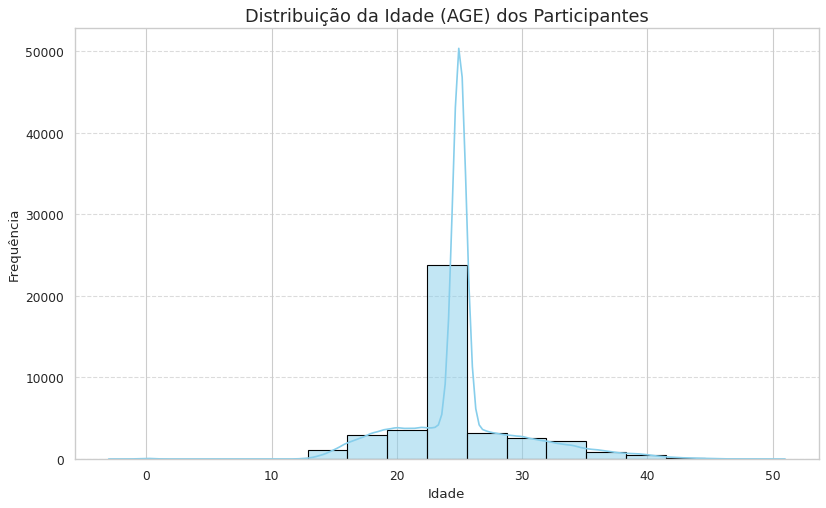

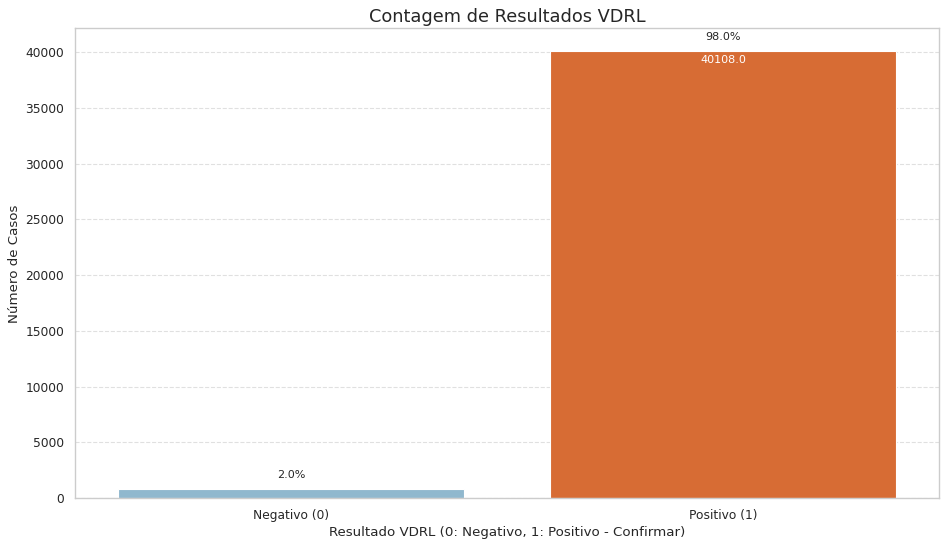

In [138]:
sns.histplot(data=df, x='AGE', kde=True, bins='auto', color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade (AGE) dos Participantes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ax = sns.countplot(
    x='VDRL_RESULT',
    data=df,
    hue='VDRL_RESULT',
    palette=['#86BBD8','#F26419'],
    legend=False
)

plt.title('Contagem de Resultados VDRL', fontsize=16)
plt.xlabel('Resultado VDRL (0: Negativo, 1: Positivo - Confirmar)', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks([0, 1], ['Negativo (0)', 'Positivo (1)'])

total = len(df['VDRL_RESULT'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)
    ax.annotate(f'{p.get_height()}', (x, y - 0.05 * total), ha='center', va='bottom', fontsize=10, color='white')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#  Análise de Correlação: Relações entre Variáveis e Impacto em VDRL_RESUL e AGE

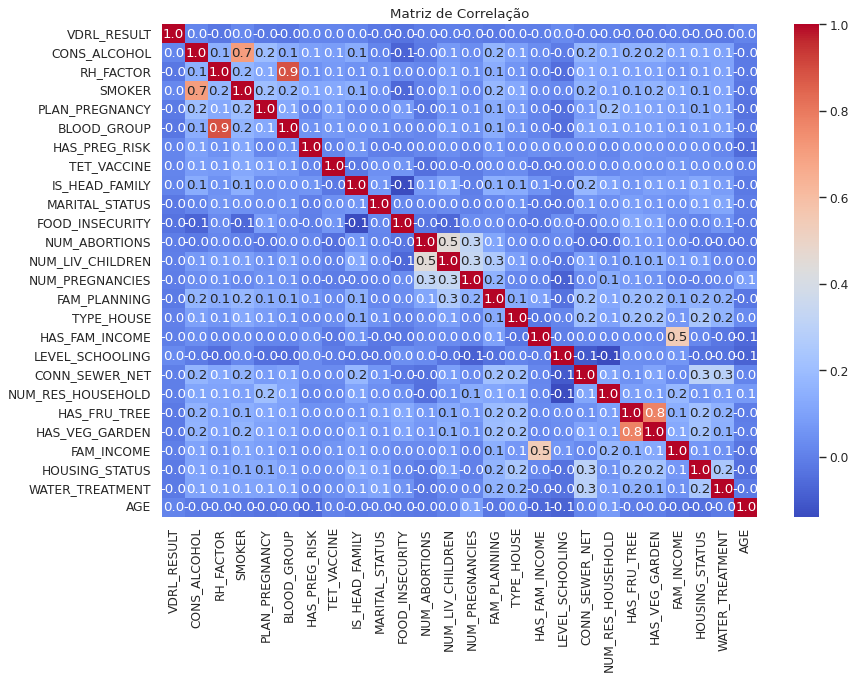

Maiores correlações com VDRL_RESULT
VDRL_RESULT        1.000000
FOOD_INSECURITY    0.036165
LEVEL_SCHOOLING    0.028551
RH_FACTOR          0.024484
SMOKER             0.024327
BLOOD_GROUP        0.023913
MARITAL_STATUS     0.022615
FAM_PLANNING       0.018058
WATER_TREATMENT    0.017584
CONS_ALCOHOL       0.016053
Name: VDRL_RESULT, dtype: float64
Maiores correlações com AGE
AGE                  1.000000
NUM_PREGNANCIES      0.101476
LEVEL_SCHOOLING      0.078605
NUM_RES_HOUSEHOLD    0.076748
HAS_FAM_INCOME       0.060326
HAS_PREG_RISK        0.056385
HOUSING_STATUS       0.042394
PLAN_PREGNANCY       0.033880
FAM_INCOME           0.031367
TYPE_HOUSE           0.028937
Name: AGE, dtype: float64


In [142]:
numeric_data = df.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Matriz de Correlação')
plt.show()

print("Maiores correlações com VDRL_RESULT")
vdrl_corr = correlation['VDRL_RESULT'].abs().sort_values(ascending=False)
print(vdrl_corr.head(10))

print("Maiores correlações com AGE")
age_corr = correlation['AGE'].abs().sort_values(ascending=False)
print(age_corr.head(10))

# Definição de Variáveis Alvo e Identificação de Tipos de Atributos

In [132]:
target_classification = 'VDRL_RESULT'
target_regression = 'AGE'

X = df.drop(columns=[target_classification, target_regression])

y_class = df[target_classification]
y_reg = df[target_regression]

nunique_threshold = 10

categorical_cols_X = [col for col in X.columns if X[col].nunique() < nunique_threshold]
numerical_cols_X = [col for col in X.columns if X[col].nunique() >= nunique_threshold]


print(f"Colunas Categóricas em X ({len(categorical_cols_X)}): {categorical_cols_X}")
print(f"Colunas Numéricas em X ({len(numerical_cols_X)}): {numerical_cols_X}")

if len(categorical_cols_X) + len(numerical_cols_X) == X.shape[1]:
    print("Todas as colunas em X foram classificadas como categóricas ou numéricas.")
else:
    print("Atenção! Algumas colunas em X não foram classificadas. Verifique as listas.")

Colunas Categóricas em X (23): ['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']
Colunas Numéricas em X (1): ['LEVEL_SCHOOLING']
Todas as colunas em X foram classificadas como categóricas ou numéricas.


##Criação do Pipeline de Pré-processamento de Atributos

In [133]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_X),
        ('cat', categorical_transformer, categorical_cols_X)
    ],
    remainder='passthrough'
)

Preprocess ColumnTransformer criado.


##Treinamento e Avaliação do Modelo de Regressão para AGE

In [126]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
model_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])

model_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print(f"\nRegressão AGE:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Regressão - RandomForestRegressor (prever AGE):
Mean Absolute Error (MAE): 2.9260
Mean Squared Error (MSE): 17.3314
Root Mean Squared Error (RMSE): 4.1631


##Classificação de VDRL_RESUL com Decision Tree e Tratamento de Desbalanceamento com SMOTEENN

Treinando o modelo com reamostragem (SMOTEENN)...
Treinamento concluído.
AUC-ROC Score (com reamostragem): 0.5641

Matriz de Confusão (com reamostragem):


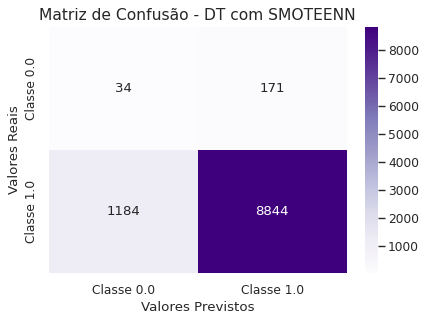


Métricas (para a classe positiva, average='binary' com reamostragem):
Precision: 0.0279
Recall (Sensibilidade): 0.1659
F1-score: 0.0478

Comparativo AUC-ROC (Decision Tree):
  Sem reamostragem (Decision Tree): 0.5709
  Com SMOTEENN (Decision Tree): 0.5641


In [141]:

model_class_resampled_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=123, n_jobs=-1)), # Usando SMOTEENN
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123, criterion='gini'))
])

print(f"Treinando o modelo com reamostragem ({type(model_class_resampled_dt.named_steps['resampler']).__name__})...")
model_class_resampled_dt.fit(X_train_class, y_train_class)
print("Treinamento concluído.")

y_pred_class_resampled_dt = model_class_resampled_dt.predict(X_test_class)
y_pred_proba_class_resampled_dt = model_class_resampled_dt.predict_proba(X_test_class)[:, 1]

# 2. AUC-ROC Score
auc_roc_resampled_dt = roc_auc_score(y_test_class, y_pred_proba_class_resampled_dt)
print(f"AUC-ROC Score (com reamostragem): {auc_roc_resampled_dt:.4f}")

# 3. Matriz de Confusão
print("\nMatriz de Confusão (com reamostragem):")
cm_resampled_dt = confusion_matrix(y_test_class, y_pred_class_resampled_dt)
# print(cm_resampled_dt)

# Visualização da Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm_resampled_dt, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title(f'Matriz de Confusão - DT com {type(SMOTEENN()).__name__}', fontsize=14)
plt.show()

if len(y_class.unique()) == 2:
    precision_resampled_dt, recall_resampled_dt, f1_resampled_dt, _ = precision_recall_fscore_support(
        y_test_class, y_pred_class_resampled_dt, average='binary', pos_label=y_class.unique()[1]
    )
    print(f"\nMétricas (para a classe positiva, average='binary' com reamostragem):")
    print(f"Precision: {precision_resampled_dt:.4f}")
    print(f"Recall (Sensibilidade): {recall_resampled_dt:.4f}")
    print(f"F1-score: {f1_resampled_dt:.4f}")

print(f"\nComparativo AUC-ROC (Decision Tree):")
print(f"  Sem reamostragem (Decision Tree): {auc_roc_dt:.4f}")
print(f"  Com {type(SMOTEENN()).__name__} (Decision Tree): {auc_roc_resampled_dt:.4f}")

##Análise de Importância das Features no Modelo Decision Tree

Número de features processadas e suas importâncias: 89

Top Features por Importância:
                 Feature  Importance
0        LEVEL_SCHOOLING    0.103858
81    HOUSING_STATUS_1.0    0.043055
39     NUM_ABORTIONS_3.0    0.036075
13       BLOOD_GROUP_0.0    0.032065
44  NUM_LIV_CHILDREN_4.0    0.028290


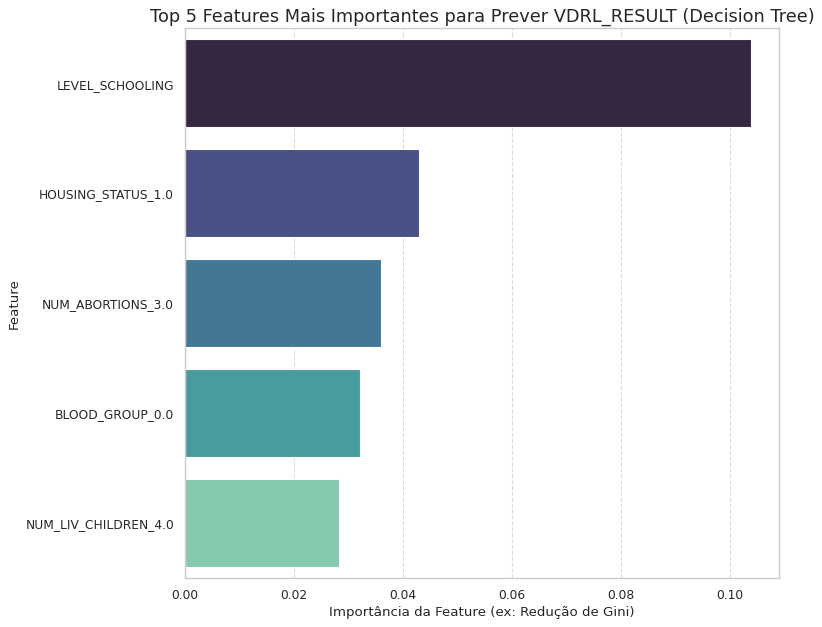

In [139]:
try:
    classifier_step = model_class_dt.named_steps['classifier']
    preprocessor_step = model_class_dt.named_steps['preprocessor']
except AttributeError:
    print("Erro: O pipeline 'model_class_dt' ou seus steps não foram encontrados.")
    print("Certifique-se de que a célula com o treinamento do DecisionTreeClassifier (Célula 7) foi executada.")
    raise

importances = classifier_step.feature_importances_

num_feature_names = numerical_cols_X

ohe_transformer = preprocessor_step.named_transformers_['cat']
cat_feature_names_ohe = ohe_transformer.get_feature_names_out(categorical_cols_X)

processed_feature_names = list(num_feature_names) + list(cat_feature_names_ohe)

if len(importances) != len(processed_feature_names):
    print(f"Alerta! O número de importâncias ({len(importances)}) não corresponde ao número de nomes de features processadas ({len(processed_feature_names)}).")
    print("Verifique a ordem e a definição das colunas no ColumnTransformer e nas listas numerical_cols_X/categorical_cols_X.")
else:
    print(f"Número de features processadas e suas importâncias: {len(processed_feature_names)}")

    feature_importance_df = pd.DataFrame({
        'Feature': processed_feature_names,
        'Importance': importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nTop Features por Importância:")
    print(feature_importance_df.head(5))

    plt.figure(figsize=(10, 8))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=feature_importance_df.head(5),
        hue='Feature',
        palette='mako',
        legend=False
    )
    plt.title('Top 5 Features Mais Importantes para Prever VDRL_RESULT (Decision Tree)', fontsize=16)
    plt.xlabel('Importância da Feature (ex: Redução de Gini)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()